In [1]:
import os, sys
sys.path.insert(0, f"{os.getcwd()}/../pconv_unet")

In [2]:
from model import PConvUnet

ASSETS_DIR = f"{os.getcwd()}/../pconv_unet/assets"
TRAINED_MODELS_DIR = os.path.join(ASSETS_DIR, "trained_models")
IMAGE_SIZE = 256

In [3]:
import tensorflow as tf

checkpoint = tf.train.latest_checkpoint(
    TRAINED_MODELS_DIR, os.path.join(TRAINED_MODELS_DIR, "checkpoint"))
inpainting_model = PConvUnet(vgg_path="", image_size=IMAGE_SIZE)
inpainting_model.load_model(checkpoint)

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def run(image_path, mask_path, invert_mask=False):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(mask_path).astype(np.float32)
    mask /= 255.
    mask = (mask >= 0.5).astype(np.float32) * 255.
    if invert_mask:
        mask = 255. * np.ones(image.shape) - mask # inverted

    image_shape = image.shape

    _image = cv2.resize(
        image, dsize=(IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_CUBIC)
    _image = np.expand_dims(_image, axis=0) / 255.
    _mask = cv2.resize(
        mask, dsize=(IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_CUBIC) / 255.
    _mask = np.expand_dims(_mask, axis=0)

    painted = inpainting_model.pconv_unet([_image, _mask])
    painted = np.squeeze(painted)
    painted = cv2.resize(painted,
                         dsize=(image_shape[1], image_shape[0]),
                         interpolation=cv2.INTER_CUBIC)


    plt.imshow(image)
    plt.show()

    plt.imshow(mask)
    plt.show()

    plt.imshow(painted)
    plt.show()


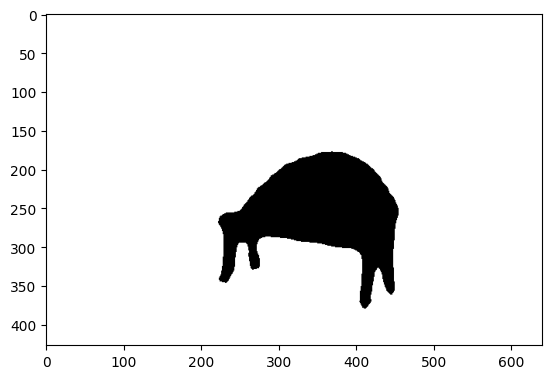

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


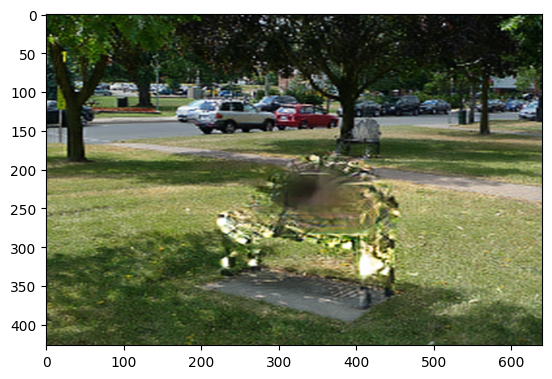

In [5]:
run("assets/image1.png", "assets/mask1.png", invert_mask=True)

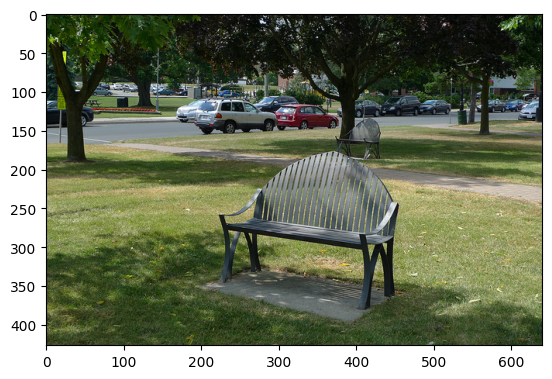

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


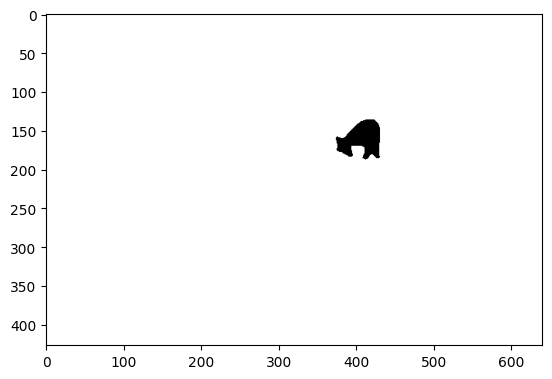

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


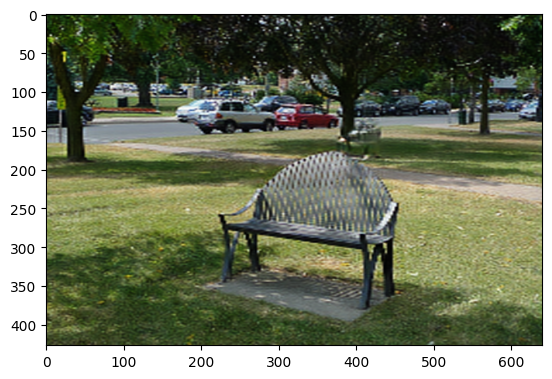

In [6]:
run("assets/image1.png", "assets/mask1-1.png", invert_mask=False)

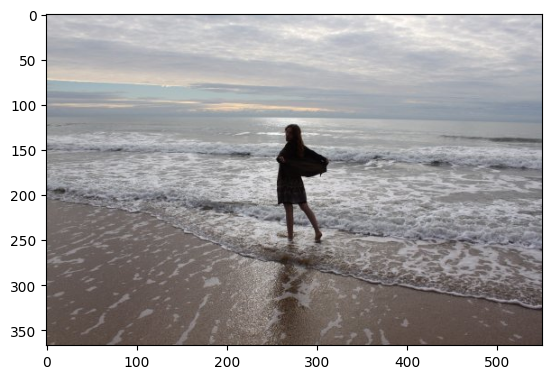

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


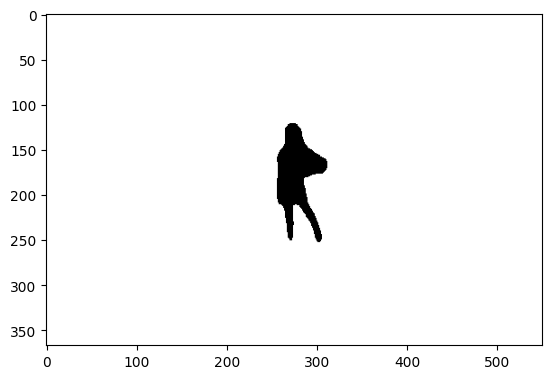

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


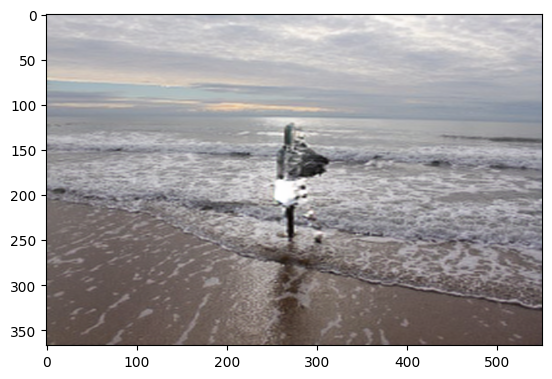

In [7]:
run("assets/image2.png", "assets/mask2.png", invert_mask=False)

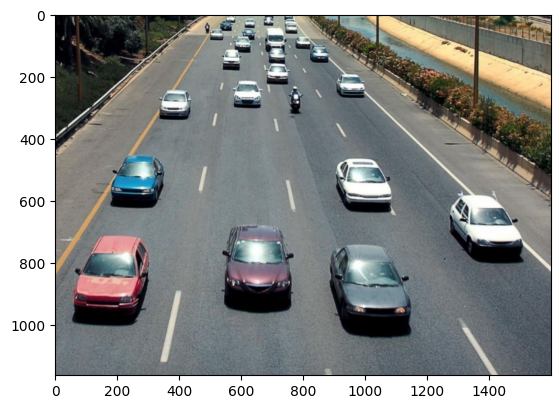

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


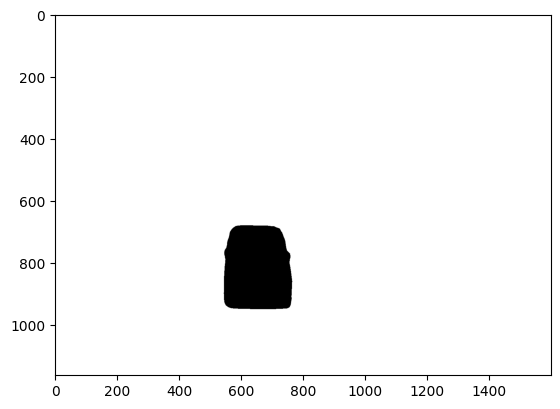

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


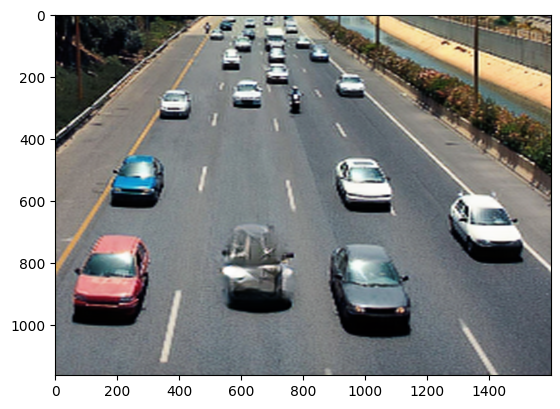

In [8]:
run("assets/image3.png", "assets/mask3.png", invert_mask=False)

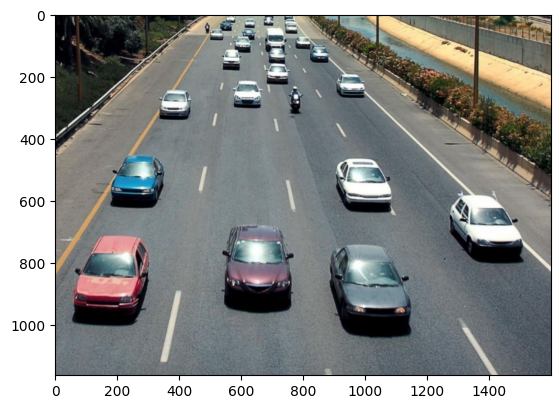

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


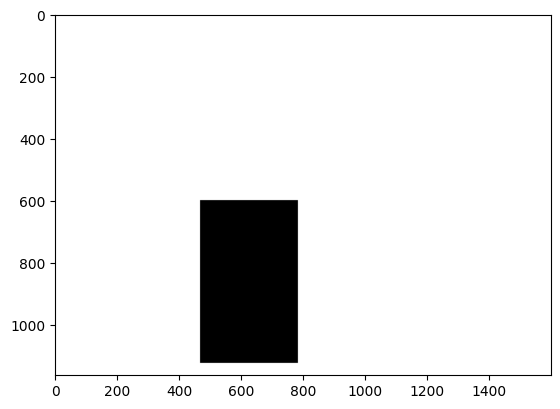

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


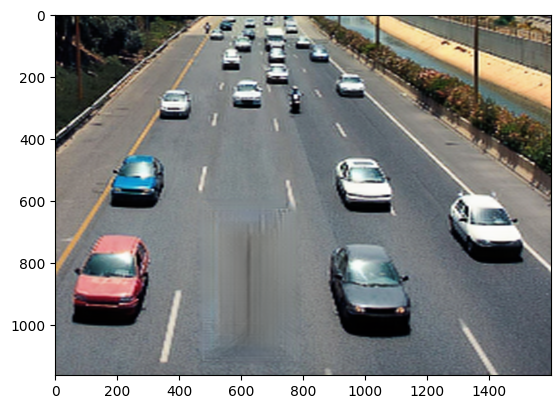

In [9]:
run("assets/image3.png", "assets/mask3-1.png", invert_mask=False)